In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nltk
import pandas as pd
import TraverseDir.TraverseDir as td
import pandas_toolkit.mytoolkit as tk

In [2]:
#read csv files:name and path

In [3]:
rootDir = '/Users/wangmu/Documents/Science/mG1/数据/sec'

In [7]:
file_path_list = td.show_all_path(rootDir)
file_name_list = td.get_filename(file_path_list)

In [152]:
#overview alldata in rootDir
print('length is: '+f'{len(file_name_list)}')
print('type is: '+f"{type(file_name_list)}")

length is: 8193
type is: <class 'list'>


In [8]:
# overview all data in our lab

#testdir = '/Users/wangmu/Desktop/laballdata'
#file_path_list = td.show_all_path(testdir)
#file_name_list = td.get_filename(file_path_list)
#len(file_name_list)

# >49593

In [10]:
# make list[('name',pandas.df),...]
data_list = []
for finame,fipath in zip(file_name_list,file_path_list):
    data_pair= (finame,tk.onestep_norm_peak2zero(fipath))
    data_list.append(data_pair)

ss = data_list


In [74]:
# overview ss
print(len(ss))
ss[0]

8193


('5415',       time  peak
 0      NaN   NaN
 1      NaN   NaN
 2      NaN   NaN
 3      NaN   NaN
 4      NaN   NaN
 5      NaN   NaN
 6      NaN   NaN
 7      NaN   NaN
 8      NaN   NaN
 9      NaN   NaN
 10     NaN   NaN
 11     NaN   NaN
 12     NaN   NaN
 13     NaN   NaN
 14     NaN   NaN
 15     NaN   NaN
 16     NaN   NaN
 17     NaN   NaN
 18     NaN   NaN
 19     NaN   NaN
 20     NaN   NaN
 21     NaN   NaN
 22     NaN   NaN
 23     NaN   NaN
 24     NaN   NaN
 25     NaN   NaN
 26     NaN   NaN
 27     NaN   NaN
 28     NaN   NaN
 29     NaN   NaN
 ...    ...   ...
 3271   NaN   NaN
 3272   NaN   NaN
 3273   NaN   NaN
 3274   NaN   NaN
 3275   NaN   NaN
 3276   NaN   NaN
 3277   NaN   NaN
 3278   NaN   NaN
 3279   NaN   NaN
 3280   NaN   NaN
 3281   NaN   NaN
 3282   NaN   NaN
 3283   NaN   NaN
 3284   NaN   NaN
 3285   NaN   NaN
 3286   NaN   NaN
 3287   NaN   NaN
 3288   NaN   NaN
 3289   NaN   NaN
 3290   NaN   NaN
 3291   NaN   NaN
 3292   NaN   NaN
 3293   NaN   NaN
 3

In [37]:
test_data = ss[200]

In [38]:
tname,tdf = test_data

In [39]:
tname


'6930'

In [40]:
tdf

,time,peak
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


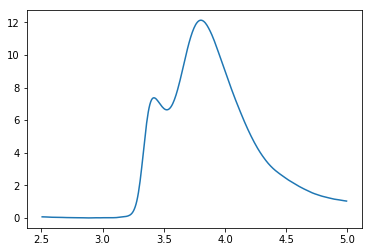

In [41]:
plt.plot(tdf.time,tdf.peak)
plt.show()

In [51]:
#fine max peak
tdf.peak.max()

12.12835312

In [50]:
#find max peak's time
tdf.time[tdf.peak==tdf.peak.max()].max()

3.806666667

In [77]:
def find_peak_time(df:"pandas Dataframe"):
    '''
    input : df
    output: list [max_peak_time,max_peak_height] as feature
    '''
    max_peak_height=df.peak.max()
    max_peak_time = df.time[df.peak==max_peak_height].max()
    return [max_peak_time,max_peak_height]

In [78]:
#test function find_peak_time
aa= find_peak_time(tdf)
aa

[2.56, 0.05960464477539096]

In [79]:
# get list of feature vectorize 
feature_list = []
for name,df in ss:
    feature_list.append((name,find_peak_time(df)))

print(len(feature_list))

8193


In [117]:
x = []
y = []
for name,fea in feature_list:
    x.append(fea[0])
    y.append(fea[1])
#x = np.array(x)
#y = np.array(y)


In [120]:
max(x)
max(y)

269.3357467651365

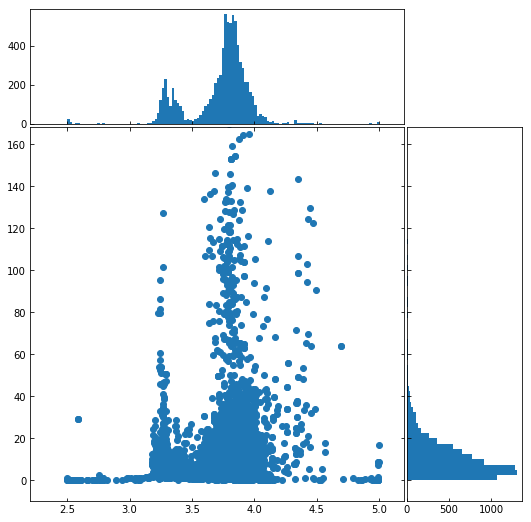

In [144]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y)

# now determine nice limits by hand:
binwidth =1.25 # 柱形图的柱子的跨度
limx= ((max([max(x),abs(min(x))])) * binwidth) /2
limy= ((max([max(y),abs(min(y))])) * binwidth)/2

# x， y 上下限
ax_scatter.set_xlim((2.2, 5.2))
ax_scatter.set_ylim((-10, limy))

# 柱子间距
binsx = np.arange(2.2, 5.5 ,0.02)
binsy = np.arange(-10,limy,2.5)
ax_histx.hist(x, bins=binsx)
ax_histy.hist(y, bins=binsy, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

In [145]:
#以上完成了8000个样品的2d图绘制


In [153]:
#之后完成 “峰宽”特征的抓取


In [154]:
#可以用这样的图来显示某类样品的实验情况
